# **Analysis of COVID-19 Cases in Malaysia**
Hello all, in this notebook, we will see how COVID-19 has progressed in Malaysia since the first case was announced.

**Current Updates**

1. Please take note that some of the dates have insufficient data, especially on the earlier part of the 1st wave (22nd Jan 2020-26th February 2020).

2. Malaysia is currently under the 2nd wave of COVID-19, surging from <100 cases to ~4700 cases as of 12th April 2020 (since 27th February 2020). Source: https://www.thestar.com.my/news/nation/2020/03/23/covid-19-current-situation-in-malaysia-updated-daily

3. Malaysia has taken the initative to perform Restricted Movement Order(RMO) for 14 days starting from 18th March 2020 until 31st of March 2020. At the moment, there are 2 additional RMO phase, and it is expected to end on 28th April 2020. Hence, the total days of RMO will amount to 42 days.

<center>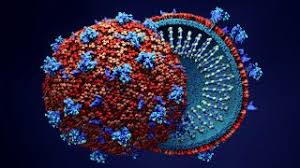</center>


### <center> Coronavirus Visualisation </center>



### Please leave a comment for further improvements. Thanks!
#### Download updated world stats at https://www.kaggle.com/imdevskp/corona-virus-report
   





In [1]:
# import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib.pyplot import figure
import folium
import geopandas as gpd
from folium.plugins import TimestampedGeoJson
import math

from pathlib import Path
data_dir = Path('../input')

import os
os.listdir(data_dir)


['covid19-world-malaysiaby-state-dataset', 'corona-virus-report']

In [2]:
#import csv file for all country. We can do comparative analysis later 
cleaned_data = pd.read_csv(data_dir/'corona-virus-report/covid_19_clean_complete.csv', parse_dates=['Date'])
cleaned_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [3]:
cleaned_data.rename(columns={'ObservationDate': 'date', 
                     'Province/State':'state',
                     'Country/Region':'country',
                     'Last Update':'last_updated',
                     'Confirmed': 'confirmed',
                     'Deaths':'deaths',
                     'Recovered':'recovered'
                    }, inplace=True)

# cases 
cases = ['confirmed', 'deaths', 'recovered', 'active']

# Active Case = confirmed - deaths - recovered
cleaned_data['active'] = cleaned_data['confirmed'] - cleaned_data['deaths'] - cleaned_data['recovered']

# replacing Mainland china with just China
cleaned_data['country'] = cleaned_data['country'].replace('Mainland China', 'China')

# filling missing values 
cleaned_data[['state']] = cleaned_data[['state']].fillna('')
cleaned_data[cases] = cleaned_data[cases].fillna(0)
cleaned_data.rename(columns={'Date':'date'}, inplace=True)

data = cleaned_data

In [4]:
#date stuff
print("External Data")
print(f"Earliest Entry: {data['date'].min()}")
print(f"Last Entry:     {data['date'].max()}")
print(f"Total Days:     {data['date'].max() - data['date'].min()}")

data.head()

External Data
Earliest Entry: 2020-01-22 00:00:00
Last Entry:     2020-04-11 00:00:00
Total Days:     80 days 00:00:00


,state,country,Lat,Long,date,confirmed,deaths,recovered,active
0,,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0,0
1,,Albania,41.1533,20.1683,2020-01-22,0,0,0,0
2,,Algeria,28.0339,1.6596,2020-01-22,0,0,0,0
3,,Andorra,42.5063,1.5218,2020-01-22,0,0,0,0
4,,Angola,-11.2027,17.8739,2020-01-22,0,0,0,0


# General Outlook

In [5]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots

In [6]:
formated_gdf = data.groupby(['date', 'country'])['confirmed', 'deaths'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['date'] = pd.to_datetime(formated_gdf['date'])
formated_gdf['date'] = formated_gdf['date'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['confirmed'].pow(0.3)

fig = px.scatter_geo(formated_gdf, locations="country", locationmode='country names', 
                     color="confirmed", size='size', hover_name="country", 
                     range_color= [0, 1500], 
                     projection="natural earth", animation_frame="date", scope='world', 
                     title='COVID-19: Spread Over Time', color_continuous_scale="portland",width=1400, height=900)
# fig.update(layout_coloraxis_showscale=False)
fig.show()

# Malaysia Analysis

# Confirmed and Active Cases


In [7]:
#extract rows pertinent to Malaysia only
myr = data[data['country']=='Malaysia']
myr.reset_index(drop=True, inplace=True)
myr

,state,country,Lat,Long,date,confirmed,deaths,recovered,active
0,,Malaysia,2.5,112.5,2020-01-22,0,0,0,0
1,,Malaysia,2.5,112.5,2020-01-23,0,0,0,0
2,,Malaysia,2.5,112.5,2020-01-24,0,0,0,0
3,,Malaysia,2.5,112.5,2020-01-25,3,0,0,3
4,,Malaysia,2.5,112.5,2020-01-26,4,0,0,4
...,...,...,...,...,...,...,...,...,...
76,,Malaysia,2.5,112.5,2020-04-07,3963,63,1321,2579
77,,Malaysia,2.5,112.5,2020-04-08,4119,65,1487,2567
78,,Malaysia,2.5,112.5,2020-04-09,4228,67,1608,2553
79,,Malaysia,2.5,112.5,2020-04-10,4346,70,1830,2446


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



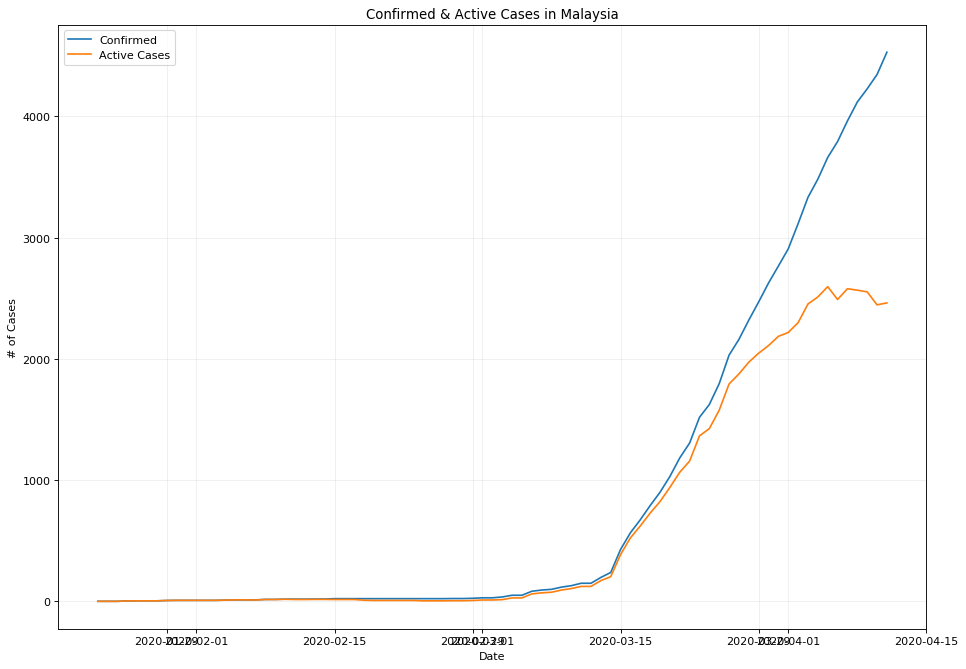

In [8]:
#
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Confirmed & Active Cases in Malaysia')
plt.xlabel('Date')
plt.ylabel('# of Cases')

plt.plot(myr.date,myr.confirmed,'-', label='Confirmed')
plt.plot(myr.date,myr.active,'-', label= 'Active Cases')



plt.grid(alpha=0.2)
plt.legend(loc="upper left")

# New Cases Since RMO


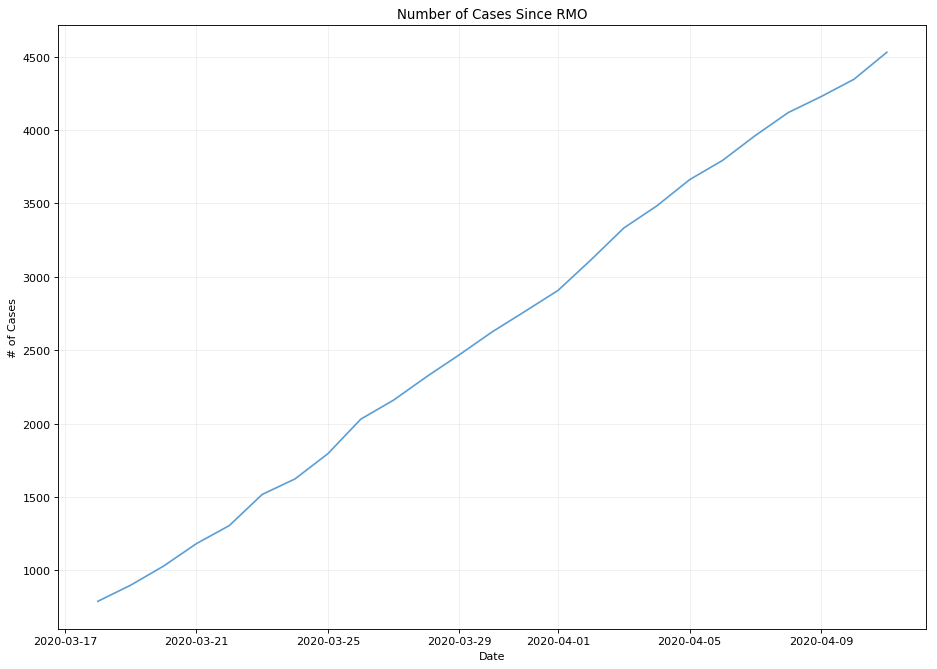

In [9]:
fig=plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Number of Cases Since RMO')
plt.xlabel('Date')
plt.ylabel('# of Cases')

drmo=myr.date[56:]
crmo=myr.confirmed[56:]
plt.plot(drmo,crmo,color='#3186cc', alpha=0.8)
plt.grid(alpha=0.2)

# New Cases Daily

In [10]:
#number of new cases calculation
n=1
newcase=[0]
while n < len(myr.confirmed):
    newcase.append(myr.confirmed[n] - myr.confirmed[n-1])
    n+=1
    
day = np.array(range(1,len(newcase)+1))

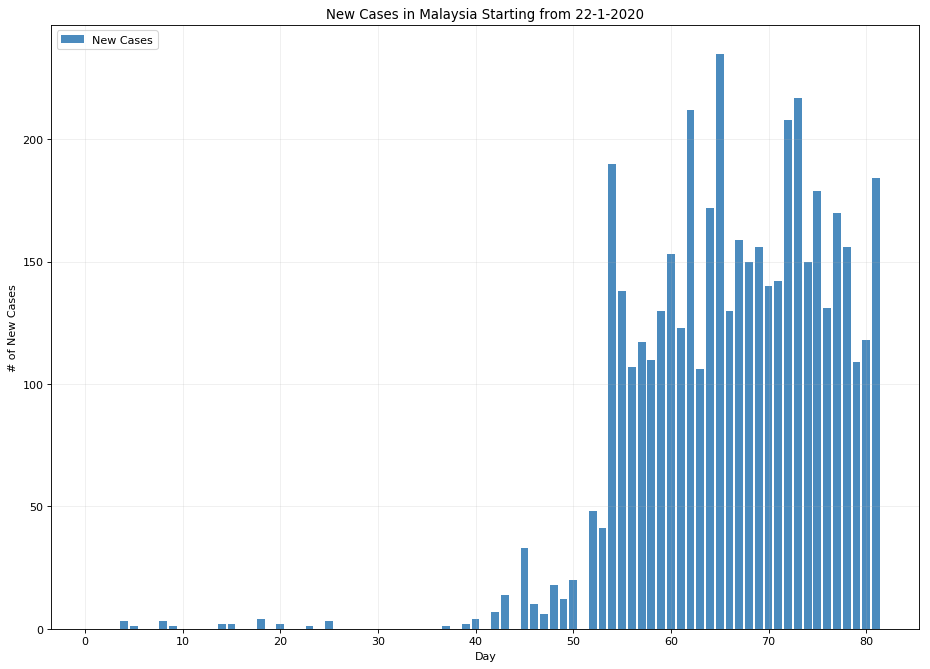

In [11]:
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')

plt.xlabel('Day')
plt.ylabel('# of New Cases')
plt.title('New Cases in Malaysia Starting from 22-1-2020')


plt.bar(day,newcase, label= 'New Cases', color='#4b8bbe')

plt.legend(loc="upper left")
plt.grid(alpha=0.2)


### Fitting Non-Linear Curve Fit

In [12]:
# Lets normalize our data
day_ =day/max(day)
newcase_ =newcase/max(newcase)

In [13]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [14]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, day_, newcase_)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 8.416935, beta_2 = 0.757865


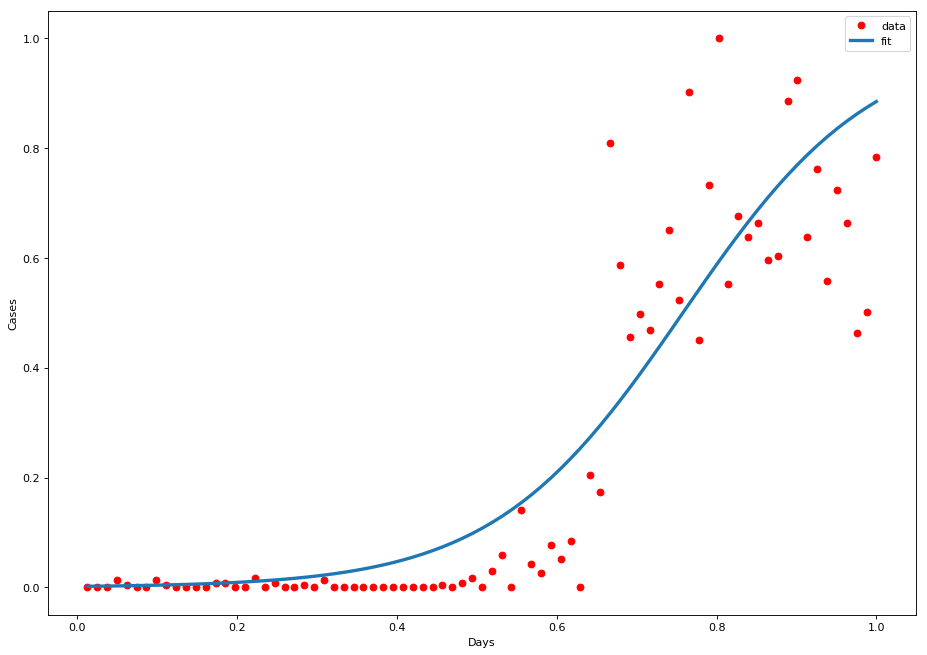

In [15]:
x = day/max(day)
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
y = sigmoid(x, *popt)
plt.plot(day_, newcase_, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('Cases')
plt.xlabel('Days')
plt.show()

## Model Accuracy

In [16]:
# split data into train/test
msk = np.random.rand(len(myr)) < 0.8
train_x = day_[msk]
test_x = day_[~msk]
train_y = newcase_[msk]
test_y = newcase_[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.09
Residual sum of squares (MSE): 0.02
R2-score: 0.71


# Closed Cases in Malaysia

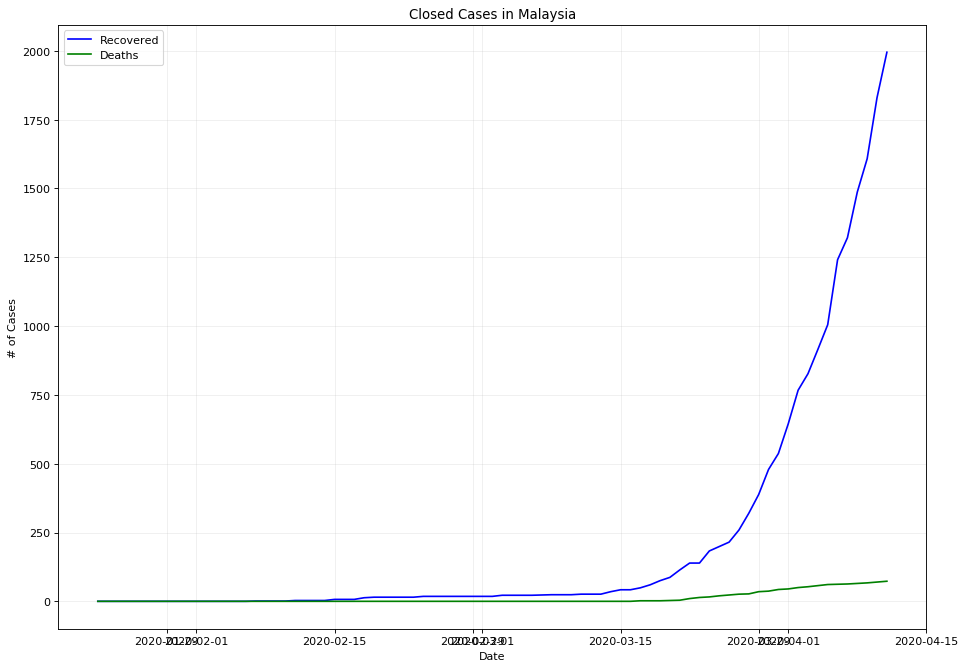

In [17]:
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.xlabel('Date')
plt.ylabel('# of Cases')
plt.title('Closed Cases in Malaysia')


plt.plot(myr.date,myr.recovered,'-', label='Recovered', color='blue')
plt.plot(myr.date,myr.deaths,'-', label= 'Deaths',color='green')
#plt.plot(myr.date,newcase,'.', label= 'New Cases', color='r')

plt.grid(alpha=0.2)
plt.legend(loc="upper left")

Our recovery rate is doing pretty good compared to the death rate, and it is rising in an exponential manner

# By-State Analysis

In [18]:
#load data
statepath=Path(data_dir/'covid19-world-malaysiaby-state-dataset/my_bystate.csv')
dfstate=pd.read_csv(statepath,encoding='latin1')
dfstate.head()

,state,addition,total,death,date,Latitude,Longitude,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Johor,NaN,16,NaN,13-03-20,1.937344,103.366585,NaN,NaN,NaN,NaN,NaN
1,Kedah,NaN,5,NaN,13-03-20,6.155672,100.569649,NaN,NaN,NaN,NaN,NaN
2,Kelantan,NaN,3,NaN,13-03-20,6.125397,102.238068,NaN,NaN,NaN,NaN,NaN
3,KL&Putrajaya,NaN,33,NaN,13-03-20,3.139000,101.686900,NaN,NaN,NaN,NaN,NaN
4,Labuan,NaN,2,NaN,13-03-20,5.283100,115.230800,NaN,NaN,NaN,NaN,NaN


In [19]:
#dataframe for each state

ked = dfstate[dfstate['state']=='Kedah']
mel = dfstate[dfstate['state']=='Melaka']
kel = dfstate[dfstate['state']=='Kelantan']
kl = dfstate[dfstate['state']=='KL&Putrajaya']
per = dfstate[dfstate['state']=='Perlis']
pen = dfstate[dfstate['state']=='P.Pinang']
n9 = dfstate[dfstate['state']=='N. Sembilan']
joh = dfstate[dfstate['state']=='Johor']
pah = dfstate[dfstate['state']=='Pahang']
sab = dfstate[dfstate['state']=='Sabah']
sar = dfstate[dfstate['state']=='Sarawak']
lab = dfstate[dfstate['state']=='Labuan']
sel = dfstate[dfstate['state']=='Selangor']
ter = dfstate[dfstate['state']=='Terengganu']
rak = dfstate[dfstate['state']=='Perak']

## Bar Race Chart

In [20]:
import matplotlib.ticker as ticker
import matplotlib.animation as animation
current_date= '12-04-20'
dt29 = dfstate[dfstate['date'].eq(current_date)].sort_values(by='total').head(15)
dt29

,state,addition,total,death,date,Latitude,Longitude,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
409,Labuan,NaN,15,0.0,12-04-20,5.283100,115.230800,NaN,NaN,NaN,NaN,NaN
415,Perlis,NaN,17,1.0,12-04-20,6.443589,100.216599,NaN,NaN,NaN,NaN,NaN
406,Kedah,NaN,93,1.0,12-04-20,6.155672,100.569649,NaN,NaN,NaN,NaN,NaN
419,Terengganu,NaN,102,1.0,12-04-20,5.311700,103.132400,NaN,NaN,NaN,NaN,NaN
412,P.Pinang,2,116,1.0,12-04-20,3.763400,103.220200,NaN,NaN,NaN,NaN,NaN
410,Melaka,3,144,3.0,12-04-20,2.194400,102.249100,NaN,NaN,NaN,NaN,NaN
407,Kelantan,1,152,3.0,12-04-20,6.125397,102.238068,NaN,NaN,NaN,NaN,NaN
413,Pahang,11,225,1.0,12-04-20,5.285153,100.456238,NaN,NaN,NaN,NaN,NaN
414,Perak,1,244,4.0,12-04-20,4.693950,101.090100,NaN,NaN,NaN,NaN,NaN
416,Sabah,6,266,3.0,12-04-20,5.420404,116.796783,NaN,NaN,NaN,NaN,NaN


In [21]:
colors = dict(zip(
    ['Labuan','Perlis','Melaka','Terengganu', 'Kedah', 'Pahang', 'P.Pinang', 'Kelantan', 'Sarawak', 'N.Sembilan', 'Perak', 'Sabah', 'Johor', 'KL&Putrajaya', 'Selangor'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
     '#aafbff', '#f7bb5f', '#eafb50','red','brown','blue','yellow','blue','green','purple','gray']
))
group_lk = dfstate['state'].to_dict()

In [22]:
def draw_barchart(date):
    dt29 = dfstate[dfstate['date'].eq(date)].sort_values(by='total').head(15)
    ax.clear()
    ax.barh(dt29['state'],dt29['total'], color=[colors[x] for x in dt29['state']])
    #dx = dff['value'].max() / 200
    
    # iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
    for i, (total, state) in enumerate(zip(dt29['total'], dt29['state'])):
        ax.text(total, i,     state,            ha='right')  # Tokyo: name
        #ax.text(total, i-.25, group_lk[name],  ha='right')  # Asia: group name
        ax.text(total, i,     total,           ha='left')   # 38194.2: value
        
    # ... polished styles
    ax.text(1, 0.4, date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Cases', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'Number of Cases By State',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by Khairul Hafiz; credit Khairul Hafiz', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)

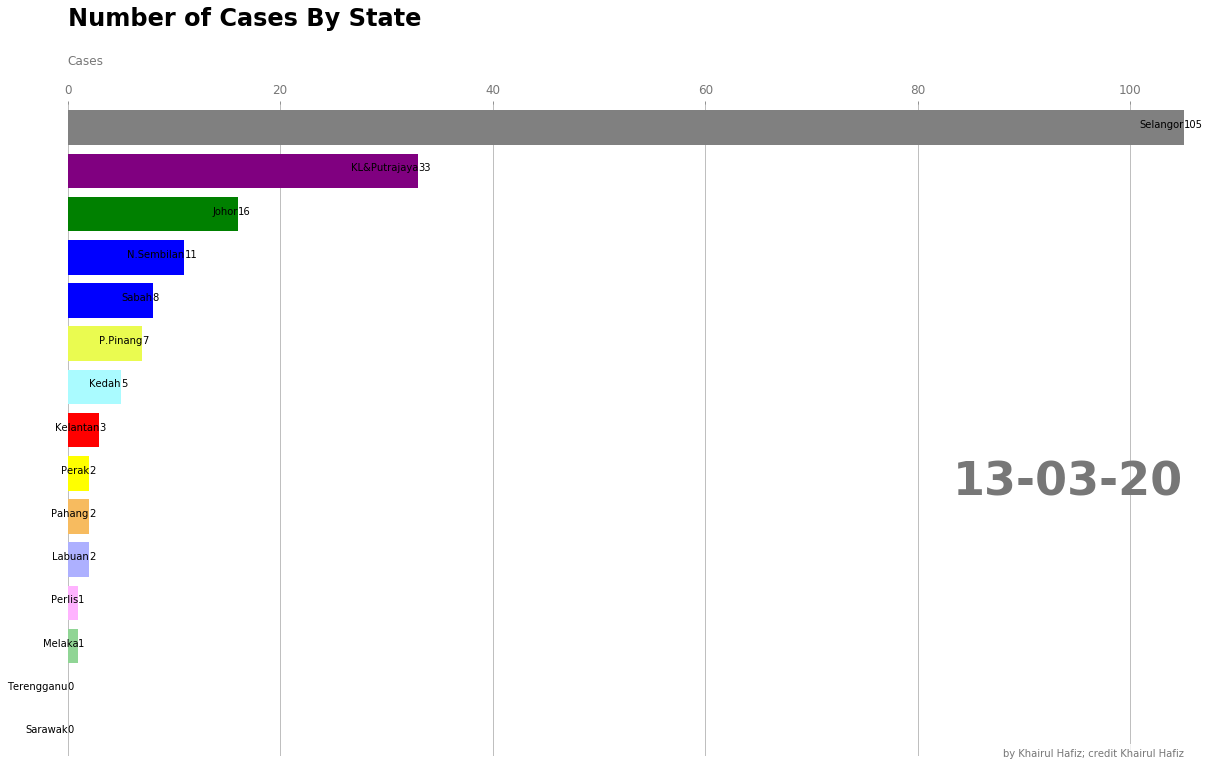

In [23]:
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(20, 12))
animator = animation.FuncAnimation(fig, draw_barchart, frames= ked.date)
HTML(animator.to_jshtml()) 

## States with The Highest Cases

Text(0, 0.5, '# of Cases')

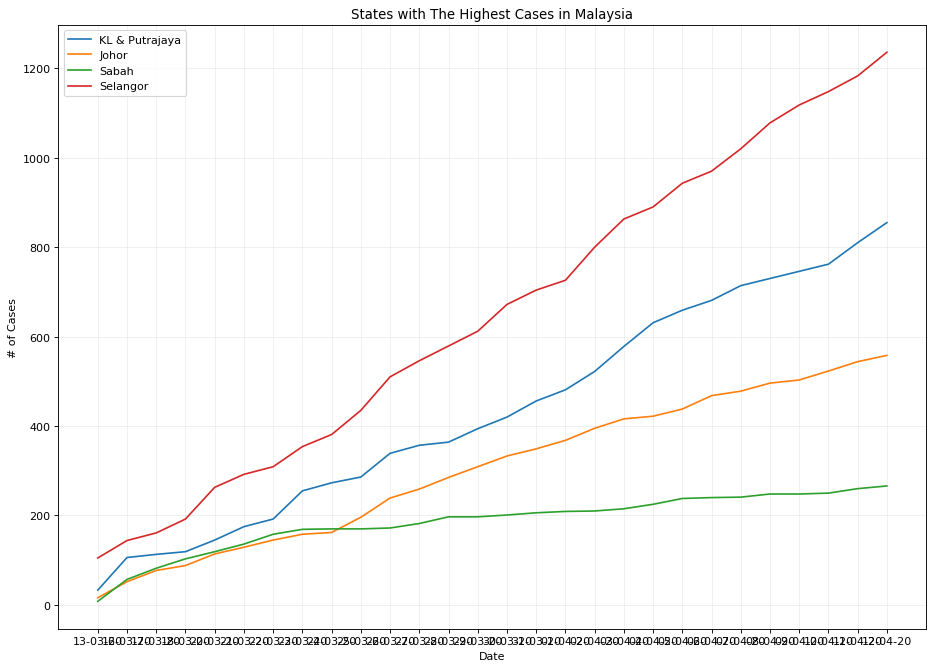

In [24]:
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('States with The Highest Cases in Malaysia')

plt.plot(kl.date,kl.total, label='KL & Putrajaya')
plt.plot(joh.date,joh.total, label='Johor')
plt.plot(sab.date,sab.total, label='Sabah')
plt.plot(sel.date,sel.total, label='Selangor')


plt.grid(alpha=0.2)
plt.legend(loc="upper left")
plt.xlabel('Date')
plt.ylabel('# of Cases')

## Other States

Text(0, 0.5, '# of Cases')

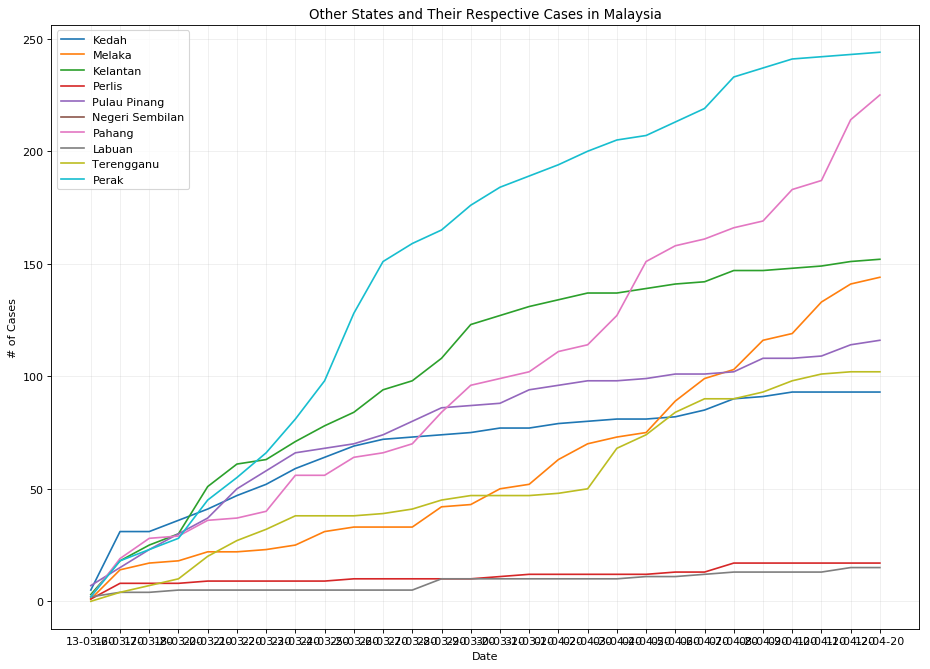

In [25]:
figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Other States and Their Respective Cases in Malaysia')

plt.plot(ked.date,ked.total, label='Kedah')
plt.plot(mel.date,mel.total, label='Melaka')
plt.plot(kel.date,kel.total, label='Kelantan')
plt.plot(per.date,per.total, label='Perlis')
plt.plot(pen.date,pen.total, label='Pulau Pinang')
plt.plot(n9.date,n9.total, label='Negeri Sembilan')
plt.plot(pah.date,pah.total, label='Pahang')
plt.plot(lab.date,lab.total, label='Labuan')
plt.plot(ter.date,ter.total, label='Terengganu')
plt.plot(rak.date,rak.total, label='Perak')

plt.grid(alpha=0.2)
plt.legend(loc="upper left")
plt.xlabel('Date')
plt.ylabel('# of Cases')

# Geographical Representation (by states)

In [26]:
latest=dfstate[dfstate['date']=='12-04-20']
latest.reset_index(level=0,drop=True, inplace=True)
latest.set_index('state', inplace=True)
latest.sort_values(by='death', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
latest

,addition,total,death,date,Latitude,Longitude,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
state,,,,,,,,,,,
Johor,14,558,14.0,12-04-20,1.937344,103.366585,NaN,NaN,NaN,NaN,NaN
Kedah,NaN,93,1.0,12-04-20,6.155672,100.569649,NaN,NaN,NaN,NaN,NaN
Kelantan,1,152,3.0,12-04-20,6.125397,102.238068,NaN,NaN,NaN,NaN,NaN
KL&Putrajaya,45,855,17.0,12-04-20,3.139000,101.686900,NaN,NaN,NaN,NaN,NaN
Labuan,NaN,15,0.0,12-04-20,5.283100,115.230800,NaN,NaN,NaN,NaN,NaN
Melaka,3,144,3.0,12-04-20,2.194400,102.249100,NaN,NaN,NaN,NaN,NaN
N.Sembilan,9,318,7.0,12-04-20,2.731813,102.252502,NaN,NaN,NaN,NaN,NaN
P.Pinang,2,116,1.0,12-04-20,3.763400,103.220200,NaN,NaN,NaN,NaN,NaN
Pahang,11,225,1.0,12-04-20,5.285153,100.456238,NaN,NaN,NaN,NaN,NaN


In [27]:
latest.index

Index(['Johor', 'Kedah', 'Kelantan', 'KL&Putrajaya', 'Labuan', 'Melaka',
       'N.Sembilan', 'P.Pinang', 'Pahang', 'Perak', 'Perlis', 'Sabah',
       'Sarawak', 'Selangor', 'Terengganu'],
      dtype='object', name='state')

In [28]:
# duplicating coordinates according to column -- not needed for now
# no differences in heatmap output
heat_cord = []

def heatcord(state):
    i=0
    while i <= latest.at[state,'total']:
        heat_cord.append([latest.at[state,'Latitude'],latest.at[state,'Longitude']])
        i+=1
    return 
        
for row in latest.index: 
     heatcord(row)

heat_map = pd.DataFrame(heat_cord,columns = ['Latitude', 'Longitude'])

In [29]:
#normalization of total cases

tot_latest= latest.total.sum()
norm_today=(latest.total)/float(tot_latest)
norm_today

state
Johor           0.119154
Kedah           0.019859
Kelantan        0.032458
KL&Putrajaya    0.182575
Labuan          0.003203
Melaka          0.030750
N.Sembilan      0.067905
P.Pinang        0.024770
Pahang          0.048046
Perak           0.052103
Perlis          0.003630
Sabah           0.056801
Sarawak         0.073030
Selangor        0.263933
Terengganu      0.021781
Name: total, dtype: float64

## Malaysia

In [30]:
my = folium.Map(width=1200,height=800,location=[4.824330, 108.304785],
        zoom_start=6) #tiles= Stamen Terrain, Stamen Toner,  

cir=150

def state_circle(MYState,warna):
    folium.CircleMarker(
        location=[latest.at[MYState,'Latitude'],latest.at[MYState,'Longitude']],
        radius=norm_today[MYState]*cir,
        popup=str(MYState),
        color=warna,
        fill=True,
        fill_color=warna,
        alpha=0.1
    ).add_to(my)

for row in latest.index: 
     state_circle(row,'#3186cc')
        
state_circle('KL&Putrajaya','red')  
my

## Peninsular Malaysia

In [31]:
#def make_map(features):
m = folium.Map(width=1200,height=800,location=[4.000, 102.295999],
        zoom_start=6.5) #tiles= Stamen Terrain, Stamen Toner, 

cir=200

def state_circle(MYState,warna):
    folium.CircleMarker(
        location=[latest.at[MYState,'Latitude'],latest.at[MYState,'Longitude']],
        radius=norm_today[MYState]*cir,
        popup=str(MYState),
        color=warna,
        fill=True,
        fill_color=warna,
        alpha=0.1
    ).add_to(m)
    #return

for row in latest.index: 
    if row !='Sarawak' and row != "Sabah" and row !="Labuan":
        state_circle(row,'#3186cc')
        
state_circle('KL&Putrajaya','red')
m

## Borneo

In [32]:
ss = folium.Map(width=1000,height=800,location=[3.412054, 114.493331],
        zoom_start=6.5) #tiles= Stamen Terrain, Stamen Toner, 

def state_circle(MYState,warna):
    folium.CircleMarker(
        location=[latest.at[MYState,'Latitude'],latest.at[MYState,'Longitude']],
        radius=norm_today[MYState]*cir,
        popup=str(MYState),
        color=warna,
        fill=True,
        fill_color=warna,
        alpha=0.1
    ).add_to(ss)

for row in latest.index: 
    if row =='Sarawak' or row == "Sabah" or row=="Labuan":
        state_circle(row,'#3186cc')
        
ss

# Heatmap (Work In Progress)

In [33]:
from folium import plugins
from folium.plugins import HeatMap

map_hooray = folium.Map(width=1200,height=800,location=[4.000, 102.295999],
                    zoom_start = 6.5) 

# Ensure you're handing it floats
latest['Latitude'] = latest['Latitude'].astype(float)
latest['Longitude'] = latest['Longitude'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
#heat_df = df_acc[df_acc['Speed_limit']=='40'] # Reducing data size so it runs faster
#heat_df = df_acc[df_acc['Year']=='2007'] # Reducing data size so it runs faster
heat_df = latest[['Latitude', 'Longitude']]
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])

# List comprehension to make out list of lists
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(map_hooray)

# Create weight column, using date
heat_df['Weight'] = ked['date'].str[0:2]
heat_df['Weight'] = heat_df['Weight'].astype(float)
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude', 'Weight'])

# List comprehension to make out list of lists
heat_data = [[[row['Latitude'],row['Longitude']] for index, row in heat_df[heat_df['Weight'] == i].iterrows()] for i in range(13,25)]

# Plot it on the map
hm = plugins.HeatMapWithTime(heat_data,auto_play=True,max_opacity=0.8)
hm.add_to(map_hooray)

# Display the map
map_hooray


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
# using duplicated coordinate data (heat_map) which idi not work

map_hooray = folium.Map(width=1200,height=800,location=[4.000, 102.295999],
                    zoom_start = 6.5) 

# Ensure you're handing it floats
heat_map['Latitude'] = heat_map['Latitude'].astype(float)
heat_map['Longitude'] = heat_map['Longitude'].astype(float)

# Filter the DF for rows, then columns, then remove NaNs
#heat_df = df_acc[df_acc['Speed_limit']=='40'] # Reducing data size so it runs faster
#heat_df = df_acc[df_acc['Year']=='2007'] # Reducing data size so it runs faster
heat_df = heat_map[['Latitude', 'Longitude']]
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude'])

# List comprehension to make out list of lists
heat_data = [[row['Latitude'],row['Longitude']] for index, row in heat_df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(map_hooray)


# Display the map
map_hooray

Khairul Hafiz 

khairulhafiz38@gmail.com